In [1]:
#Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.graphics.tsaplots as sgt
from math import sqrt
import seaborn as sns
sns.set()

In [11]:
raw_csv_data = pd.read_csv('013 IndexE8.csv')
df_comp = raw_csv_data.copy()
#Converting Time
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
#Setting Date as an index
df_comp.set_index('date', inplace=True)
#Setting Frequency as business working days
df_comp = df_comp.asfreq('b')
#Filling the Missing or Empty Values
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse

In [12]:
#Deleting unwanted columns
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [13]:
#Splitting Data into train and test
size = int(len(df_comp)*0.8)
df, df_test = df_comp[size:], df_comp[:size]

In [14]:
#Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
df['returns'] = df.market_value.pct_change(1) * 100

In [16]:
#ADFULLER TEST
sts.adfuller(df.market_value)

(-1.6447857147801237,
 0.45976122733607816,
 4,
 1251,
 {'1%': -3.4355880246374304,
  '5%': -2.8638531175675896,
  '10%': -2.568001531098063},
 13359.94152868575)

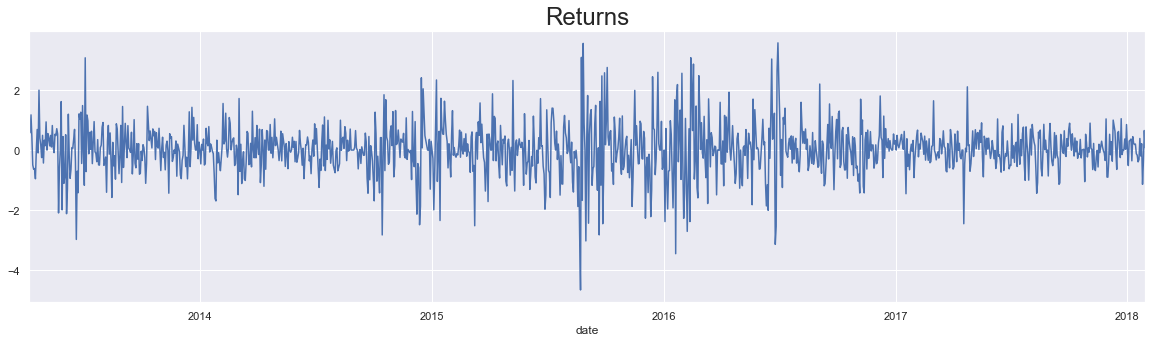

In [17]:
df.returns.plot(figsize=(20,5))
plt.title('Returns', size=24)
plt.show()

In [18]:
#ADFULLER TEST
sts.adfuller(df.returns[1:])

(-19.144530699208023,
 0.0,
 3,
 1251,
 {'1%': -3.4355880246374304,
  '5%': -2.8638531175675896,
  '10%': -2.568001531098063},
 3088.6645857988337)

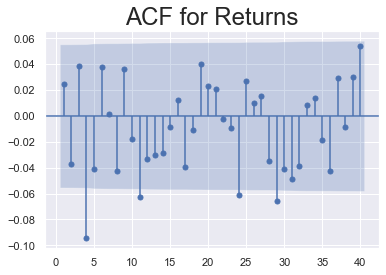

In [19]:
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.title('ACF for Returns', Size=24)
plt.show()

### Autoregressive Moving Average (ARMA)

In [20]:
#Model
#ARMA(1,1)
model_ret_am_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_am_1_ma_1 = model_ret_am_1_ma_1.fit()
print(results_ret_am_1_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(1, 1)   Log Likelihood               -1569.679
Method:                       css-mle   S.D. of innovations              0.845
Date:                Wed, 24 Mar 2021   AIC                           3147.358
Time:                        07:59:02   BIC                           3167.898
Sample:                    04-09-2013   HQIC                          3155.078
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0196      0.024      0.801      0.423      -0.028       0.068
ar.L1.returns    -0.7827      0.147     -5.322      0.000      -1.071      -0.494
ma.L1.returns     0.8287      0.132     

In [28]:
df['res_ret_am_1_ma_1'] = results_ret_am_1_ma_1.resid[1:]

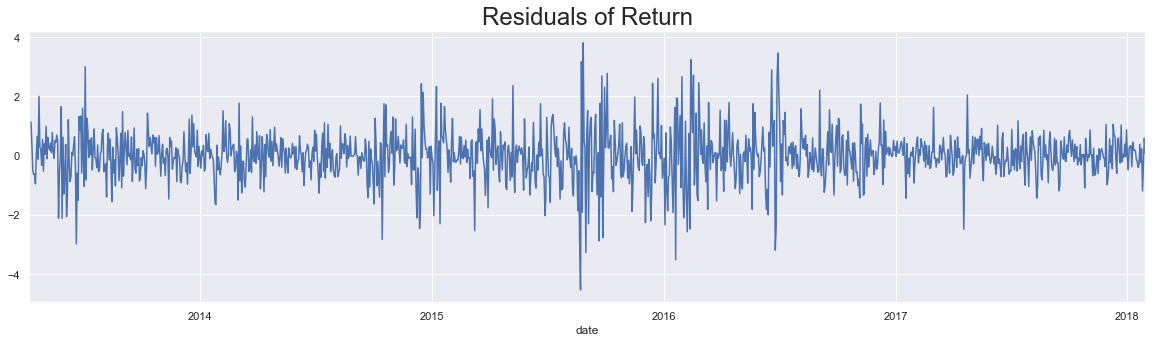

In [29]:
df.res_ret_am_1_ma_1.plot(figsize=(20,5))
plt.title('Residuals of Return', size=24)
plt.show()

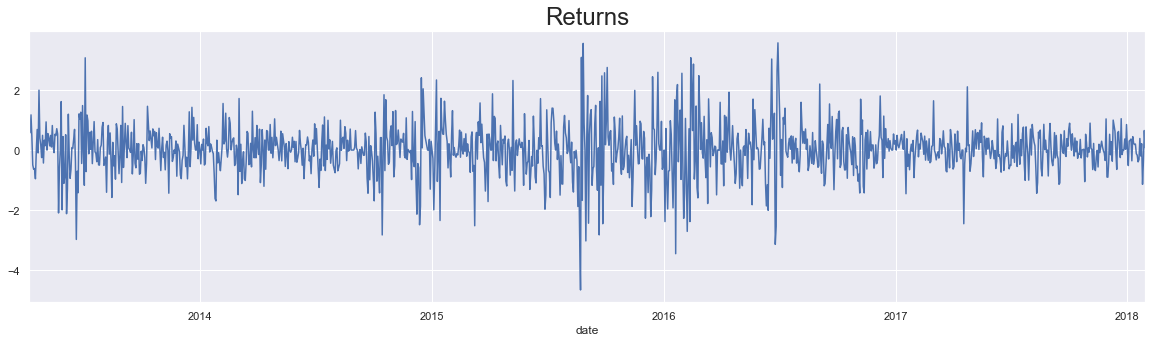

In [27]:
df.returns.plot(figsize=(20,5))
plt.title('Returns', size=24)
plt.show()

In [31]:
#ADFULLER TEST
sts.adfuller(df.res_ret_am_1_ma_1[2:])

(-15.024899859152677,
 1.0097490802777852e-27,
 5,
 1248,
 {'1%': -3.4356006420838963,
  '5%': -2.8638586845641063,
  '10%': -2.5680044958343604},
 3087.618295762046)

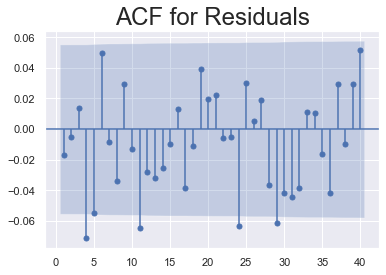

In [32]:
sgt.plot_acf(df.res_ret_am_1_ma[2:], zero=False, lags=40)
plt.title('ACF for Residuals', Size=24)
plt.show()

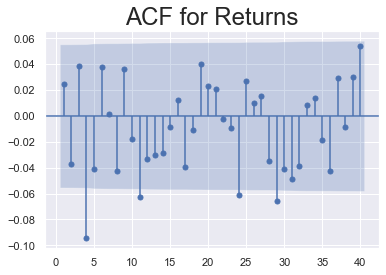

In [33]:
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.title('ACF for Returns', Size=24)
plt.show()

In [35]:
#Model
#ARMA(4,4)
model_ret_ar_4_ma_4 = ARMA(df.returns[1:], order=(4,4))
results_ret_ar_4_ma_4 = model_ret_ar_4_ma_4.fit()
print(results_ret_ar_4_ma_4.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(4, 4)   Log Likelihood               -1557.451
Method:                       css-mle   S.D. of innovations              0.837
Date:                Wed, 24 Mar 2021   AIC                           3134.902
Time:                        08:36:13   BIC                           3186.251
Sample:                    04-09-2013   HQIC                          3154.202
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0185      0.013      1.439      0.150      -0.007       0.044
ar.L1.returns     0.1326      0.327      0.406      0.685      -0.508       0.773
ar.L2.returns    -0.1884      0.114     

In [36]:
#Model
#ARMA(4,1)
model_ret_ar_4_ma_1 = ARMA(df.returns[1:], order=(4,1))
results_ret_ar_4_ma_1 = model_ret_ar_4_ma_1.fit()
print(results_ret_ar_4_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(4, 1)   Log Likelihood               -1564.234
Method:                       css-mle   S.D. of innovations              0.842
Date:                Wed, 24 Mar 2021   AIC                           3142.468
Time:                        08:37:12   BIC                           3178.412
Sample:                    04-09-2013   HQIC                          3155.978
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0195      0.022      0.901      0.368      -0.023       0.062
ar.L1.returns     0.2291      0.216      1.060      0.289      -0.195       0.653
ar.L2.returns    -0.0482      0.029     

In [37]:
#Model
#ARMA(4,2)
model_ret_ar_4_ma_2 = ARMA(df.returns[1:], order=(4,2))
results_ret_ar_4_ma_2 = model_ret_ar_4_ma_2.fit()
print(results_ret_ar_4_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(4, 2)   Log Likelihood               -1562.530
Method:                       css-mle   S.D. of innovations              0.840
Date:                Wed, 24 Mar 2021   AIC                           3141.061
Time:                        08:38:12   BIC                           3182.140
Sample:                    04-09-2013   HQIC                          3156.501
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0196      0.024      0.825      0.409      -0.027       0.066
ar.L1.returns    -0.4211      0.161     -2.622      0.009      -0.736      -0.106
ar.L2.returns    -0.7524      0.166     

In [38]:
#Model
#ARMA(4,3)
model_ret_ar_4_ma_3 = ARMA(df.returns[1:], order=(4,3))
results_ret_ar_4_ma_3 = model_ret_ar_4_ma_3.fit()
print(results_ret_ar_4_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(4, 3)   Log Likelihood               -1557.976
Method:                       css-mle   S.D. of innovations              0.837
Date:                Wed, 24 Mar 2021   AIC                           3133.952
Time:                        08:39:06   BIC                           3180.166
Sample:                    04-09-2013   HQIC                          3151.322
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0186      0.013      1.436      0.151      -0.007       0.044
ar.L1.returns     0.4069      0.101      4.016      0.000       0.208       0.606
ar.L2.returns    -0.2358      0.129     

In [39]:
#Model
#ARMA(1,4)
model_ret_ar_1_ma_4 = ARMA(df.returns[1:], order=(1,4))
results_ret_ar_1_ma_4 = model_ret_ar_1_ma_4.fit()
print(results_ret_ar_1_ma_4.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(1, 4)   Log Likelihood               -1564.257
Method:                       css-mle   S.D. of innovations              0.842
Date:                Wed, 24 Mar 2021   AIC                           3142.513
Time:                        08:40:51   BIC                           3178.457
Sample:                    04-09-2013   HQIC                          3156.023
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0196      0.021      0.922      0.356      -0.022       0.061
ar.L1.returns     0.2428      0.254      0.954      0.340      -0.256       0.742
ma.L1.returns    -0.2154      0.252     

In [40]:
#Model
#ARMA(2,4)
model_ret_ar_2_ma_4 = ARMA(df.returns[1:], order=(2,4))
results_ret_ar_2_ma_4 = model_ret_ar_2_ma_4.fit()
print(results_ret_ar_2_ma_4.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(2, 4)   Log Likelihood               -1563.190
Method:                       css-mle   S.D. of innovations              0.841
Date:                Wed, 24 Mar 2021   AIC                           3142.379
Time:                        08:42:16   BIC                           3183.458
Sample:                    04-09-2013   HQIC                          3157.819
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0196      0.023      0.848      0.397      -0.026       0.065
ar.L1.returns    -0.2006      0.449     -0.447      0.655      -1.081       0.679
ar.L2.returns    -0.5093      0.257     

In [41]:
#Model
#ARMA(3,4)
model_ret_ar_3_ma_4 = ARMA(df.returns[1:], order=(3,4))
results_ret_ar_3_ma_4 = model_ret_ar_3_ma_4.fit()
print(results_ret_ar_3_ma_4.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(3, 4)   Log Likelihood               -1557.594
Method:                       css-mle   S.D. of innovations              0.837
Date:                Wed, 24 Mar 2021   AIC                           3133.189
Time:                        08:43:47   BIC                           3179.403
Sample:                    04-09-2013   HQIC                          3150.559
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0186      0.013      1.437      0.151      -0.007       0.044
ar.L1.returns     0.2878      0.089      3.239      0.001       0.114       0.462
ar.L2.returns    -0.2131      0.115     

In [45]:
#Chosen Models
#ARMA(3,4)
#ARMA(4,3)
#Chosing the best Algorithm using LLR and AIC
#ARMA(3,4)
print('\tARMA(4,3): \tLLR = ', results_ret_ar_4_ma_3.llf, '\tAIC = ', results_ret_ar_4_ma_3.aic)
print('\tARMA(3,4): \tLLR = ', results_ret_ar_3_ma_4.llf, '\tAIC = ', results_ret_ar_3_ma_4.aic)

	ARMA(4,3): 	LLR =  -1557.9760577674845 	AIC =  3133.952115534969
	ARMA(3,4): 	LLR =  -1557.5944282083203 	AIC =  3133.1888564166406


### Resiual for ARMA(3,4) and ARMA(4,3)

In [46]:
df['results_ret_ar_4_ma_3'] = results_ret_ar_4_ma_3.resid
df['results_ret_ar_3_ma_4'] = results_ret_ar_3_ma_4.resid

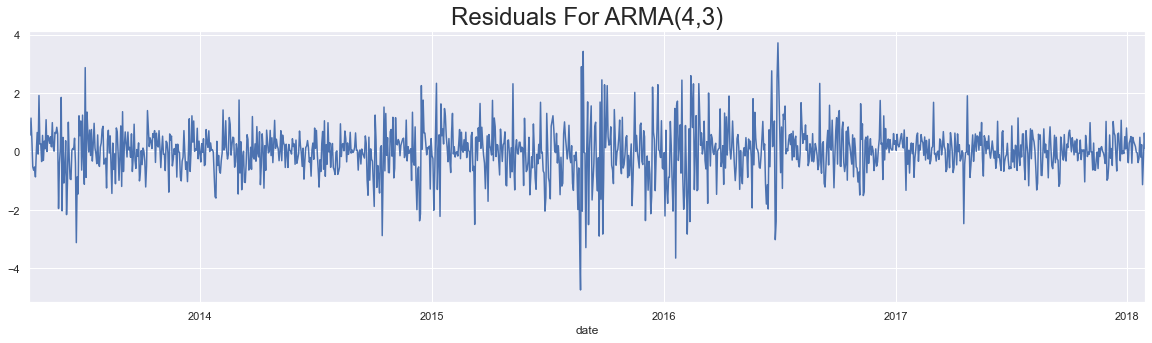

In [47]:
df.results_ret_ar_4_ma_3.plot(figsize=(20,5))
plt.title('Residuals For ARMA(4,3)', size=24)
plt.show()

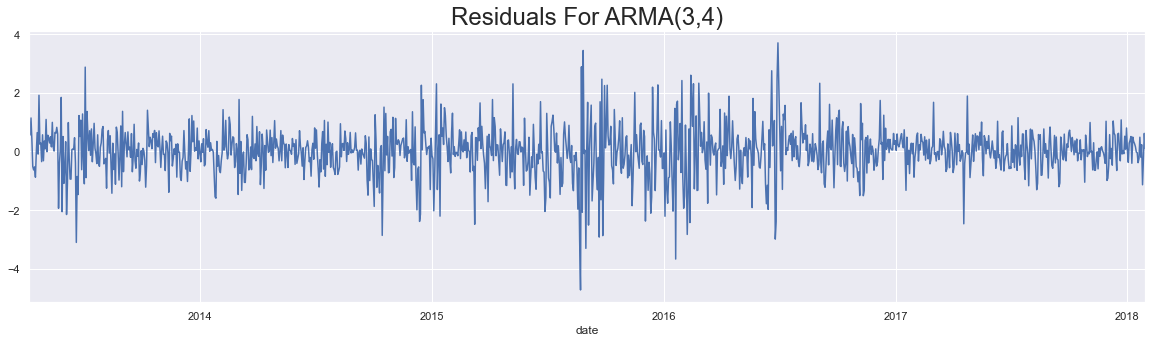

In [48]:
df.results_ret_ar_3_ma_4.plot(figsize=(20,5))
plt.title('Residuals For ARMA(3,4)', size=24)
plt.show()

In [49]:
#ADFULLER TEST
sts.adfuller(df.results_ret_ar_3_ma_4[2:])

(-35.460738084172164,
 0.0,
 0,
 1253,
 {'1%': -3.4355796466416777,
  '5%': -2.863849421064024,
  '10%': -2.5679995625056926},
 3067.0524292852238)

In [50]:
#ADFULLER TEST
sts.adfuller(df.results_ret_ar_4_ma_3[2:])

(-35.33392351727281,
 0.0,
 0,
 1253,
 {'1%': -3.4355796466416777,
  '5%': -2.863849421064024,
  '10%': -2.5679995625056926},
 3067.8842325212036)

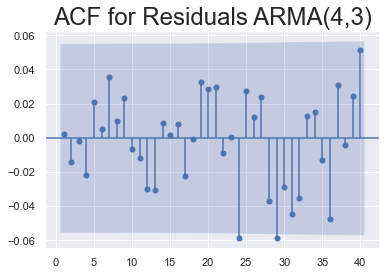

In [51]:
sgt.plot_acf(df.results_ret_ar_4_ma_3[1:], zero=False, lags=40)
plt.title('ACF for Residuals ARMA(4,3)', Size=24)
plt.show()

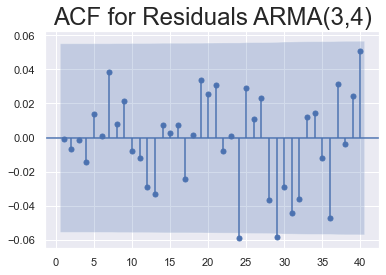

In [52]:
sgt.plot_acf(df.results_ret_ar_3_ma_4[1:], zero=False, lags=40)
plt.title('ACF for Residuals ARMA(3,4)', Size=24)
plt.show()

### ARMA(6,6)

In [53]:
#Model
#ARMA(6,6)
model_ret_ar_6_ma_6 = ARMA(df.returns[1:], order=(6,6))
results_ret_ar_6_ma_6 = model_ret_ar_6_ma_6.fit()
print(results_ret_ar_6_ma_6.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(6, 6)   Log Likelihood               -1554.476
Method:                       css-mle   S.D. of innovations              0.832
Date:                Wed, 24 Mar 2021   AIC                           3136.952
Time:                        09:03:45   BIC                           3208.840
Sample:                    04-09-2013   HQIC                          3163.972
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0195      0.024      0.817      0.414      -0.027       0.066
ar.L1.returns    -0.7215      0.152     -4.746      0.000      -1.019      -0.424
ar.L2.returns    -0.0504      0.008     

In [54]:
#Model
#ARMA(6,5)
model_ret_ar_6_ma_5 = ARMA(df.returns[1:], order=(6,5))
results_ret_ar_6_ma_5 = model_ret_ar_6_ma_5.fit()
print(results_ret_ar_6_ma_5.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(6, 5)   Log Likelihood               -1556.042
Method:                       css-mle   S.D. of innovations              0.834
Date:                Wed, 24 Mar 2021   AIC                           3138.083
Time:                        09:08:17   BIC                           3204.837
Sample:                    04-09-2013   HQIC                          3163.173
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0195      0.025      0.795      0.426      -0.029       0.068
ar.L1.returns     0.1225      0.158      0.774      0.439      -0.188       0.433
ar.L2.returns     0.0542      0.189     

In [55]:
#Model
#ARMA(6,4)
model_ret_ar_6_ma_4 = ARMA(df.returns[1:], order=(6,4))
results_ret_ar_6_ma_4 = model_ret_ar_6_ma_4.fit()
print(results_ret_ar_6_ma_4.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(6, 4)   Log Likelihood               -1556.793
Method:                       css-mle   S.D. of innovations              0.836
Date:                Wed, 24 Mar 2021   AIC                           3137.586
Time:                        09:10:54   BIC                           3199.204
Sample:                    04-09-2013   HQIC                          3160.746
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0185      0.013      1.439      0.150      -0.007       0.044
ar.L1.returns    -0.4753      0.126     -3.782      0.000      -0.722      -0.229
ar.L2.returns     0.1129      0.125     

In [56]:
#Model
#ARMA(6,3)
model_ret_ar_6_ma_3 = ARMA(df.returns[1:], order=(6,3))
results_ret_ar_6_ma_3 = model_ret_ar_6_ma_3.fit()
print(results_ret_ar_6_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(6, 3)   Log Likelihood               -1557.509
Method:                       css-mle   S.D. of innovations              0.837
Date:                Wed, 24 Mar 2021   AIC                           3137.019
Time:                        09:11:34   BIC                           3193.503
Sample:                    04-09-2013   HQIC                          3158.249
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0185      0.013      1.439      0.150      -0.007       0.044
ar.L1.returns     0.4857      0.128      3.797      0.000       0.235       0.736
ar.L2.returns    -0.3117      0.184     

In [57]:
#Model
#ARMA(5,6)
model_ret_ar_5_ma_6 = ARMA(df.returns[1:], order=(5,6))
results_ret_ar_5_ma_6 = model_ret_ar_5_ma_6.fit()
print(results_ret_ar_5_ma_6.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(5, 6)   Log Likelihood               -1555.448
Method:                       css-mle   S.D. of innovations              0.833
Date:                Wed, 24 Mar 2021   AIC                           3136.896
Time:                        09:17:28   BIC                           3203.650
Sample:                    04-09-2013   HQIC                          3161.986
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0195      0.025      0.791      0.429      -0.029       0.068
ar.L1.returns    -0.0571      0.093     -0.616      0.538      -0.239       0.124
ar.L2.returns     0.1654      0.101     

In [58]:
df['results_ret_ar_6_ma_6'] = results_ret_ar_6_ma_6.resid

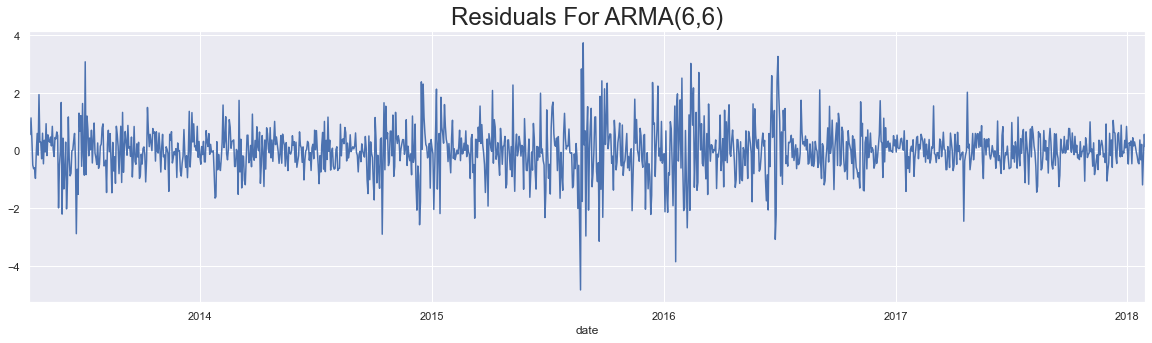

In [59]:
df.results_ret_ar_6_ma_6.plot(figsize=(20,5))
plt.title('Residuals For ARMA(6,6)', size=24)
plt.show()

In [60]:
#ADFULLER TEST
sts.adfuller(df.results_ret_ar_6_ma_6[2:])

(-35.66313741164565,
 0.0,
 0,
 1253,
 {'1%': -3.4355796466416777,
  '5%': -2.863849421064024,
  '10%': -2.5679995625056926},
 3060.4499692591517)

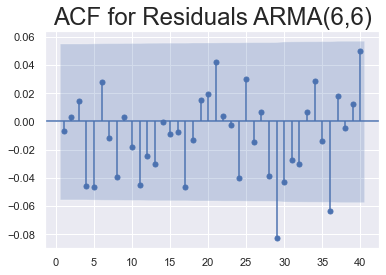

In [61]:
sgt.plot_acf(df.results_ret_ar_6_ma_6[1:], zero=False, lags=40)
plt.title('ACF for Residuals ARMA(6,6)', Size=24)
plt.show()

In [62]:
#Chosen Models
#ARMA(3,4)
#ARMA(4,3)
#Chosing the best Algorithm using LLR and AIC
#ARMA(3,4)
print('\tARMA(6,6): \tLLR = ', results_ret_ar_6_ma_6.llf, '\tAIC = ', results_ret_ar_6_ma_6.aic)
print('\tARMA(3,4): \tLLR = ', results_ret_ar_3_ma_4.llf, '\tAIC = ', results_ret_ar_3_ma_4.aic)

	ARMA(6,6): 	LLR =  -1554.4760113128677 	AIC =  3136.9520226257355
	ARMA(3,4): 	LLR =  -1557.5944282083203 	AIC =  3133.1888564166406
